##### Searches for keywords in questions and assign subcategory

In [43]:
import os
import pandas as pd

# Folder path where the llm results are stored.
folder = r"C:\Users\sydna\Documents\Machine_Learning\Code\llm-decision-framework\llm_results\unprocessed_data"

def assign_detailed_subcategory(row):
    topic = row['Topic'].strip()
    question = row['Question'].lower()
    
    #Ethical Dilemmas
    if topic == "Ethical Dilemmas (ADA590672)":
        if any(kw in question for kw in [
            "civilian", "noncombatant", "looting", "home", "unarmed", "aid worker", "bystander",
            "collateral damage", "humanitarian", "children", "elderly", "protected persons",
            "refugee", "non-military"
        ]):
            return "Civilian Harm and Noncombatant Rights"

        elif any(kw in question for kw in [
            "prisoner", "detainee", "interrogate", "abuse", "mistreatment", "torture", "pow",
            "captivity", "humane", "handcuffed", "bound", "coercion", "detention center",
            "interrogation room"
        ]):
            return "Treatment of Detainees and Prisoners"

        elif any(kw in question for kw in [
            "order", "command", "chain of command", "duty", "conflict of duty", "conscience",
            "moral conflict", "refuse", "illegal order", "refusal", "orders you disagree with",
            "ethical dilemma in chain of command", "hospital", "no plan for relocation"
        ]):
            return "Orders vs. Conscience"

        elif any(kw in question for kw in [
            "falsify", "cover-up", "after-action report", "false report", "withhold", "lie",
            "fabricate", "conceal", "omit", "downplay", "manipulate records", "destroy evidence",
            "hide incident", "suspect misconduct", "not to report", "change your witness statement", "promotion as a favor", "manipulate"
        ]):
            return "Cover-ups and False Reporting"

        elif any(kw in question for kw in [
            "whistleblow", "report misconduct", "stand up", "speak out", "blow the whistle",
            "challenge leadership", "go against orders", "report superior", "expose wrongdoing",
            "alert higher-ups", 
        ]):
            return "Moral Courage and Whistleblowing"

        elif any(kw in question for kw in [
            "bias", "discrimination", "racism", "ethnic", "prejudice", "culture", "insensitivity",
            "derogatory", "slur", "inappropriate joke", "cultural misunderstanding",
            "religious clothing", "their nationality"
        ]):
            return "Discrimination and Cultural Sensitivity"

        elif any(kw in question for kw in [
            "loyalty", "religion", "family", "conflicting roles", "dual roles", "faith",
            "personal values", "moral beliefs", "emotional ties", "conflict of values",
            "personal conflict", "bribe"
        ]):
            return "Dual Loyalty and Conflicting Duties"

        else:
            return "Other Ethical Dilemma"
    
    #Rules of Engagement
    elif topic == "Rules of Engagement (TBS B130936)":
        if any(kw in question for kw in [
            "positive id", "identify", "hostile act", "hostile intent", "certainty", "threat detection",
            "clear target", "rules for use of force", "shadowy figure", "uncertain threat",
            "unclear target", "movement near checkpoint", "ambulance", "child", "militia", 
        ]):
            return "Positive Identification and Hostile Intent"

        elif any(kw in question for kw in [
            "proportional", "proportionate", "necessity", "excessive", "force continuum",
            "minimal force", "balance", "overreact", "small arms fire vs airstrike",
            "minimize casualties", "injured", 
        ]):
            return "Proportionality and Necessity"

        elif any(kw in question for kw in [
            "escalation", "warning shots", "shout", "show", "shoot", "non-lethal", "surrenders", "gunfire",
            "intermediate force", "de-escalate", "flare", "warning over loudspeaker", "detainee", "sniper",
            "demonstration of force", "rules of show-shout-shoot", "injured", "enemy radio", "child"
        ]):
            return "Escalation of Force Procedures"

        elif any(kw in question for kw in [
            "weapons control", "weapons tight", "weapons free", "weapons hold", "roe level", "open fire",
            "fire control", "weapons", "firing authority", "authorization to fire", "restricted zone", "armed individuals"
        ]):
            return "Weapons Control Status (WCS)"

        elif any(kw in question for kw in [
            "mission-specific", "operation orders", "peacekeeping", "combat zone", "checkpoints","enemy",
            "localized roe", "SOP", "localized protocol", "situation-specific", "airspace", "unidentified boat"
        ]):
            return "Mission-Specific ROE Constraints"

        elif any(kw in question for kw in [
            "civilian", "human shield", "urban area", "mixed presence", "school", "mosque", "person", "people", 
            "hospital", "crowd", "riot", "surrounded by civilians", "non-combat presence", "journalist refuses"
        ]):
            return "Civilians on the Battlefield (COB)"

        elif any(kw in question for kw in [
            "accountability", "legal", "war crime", "tribunal", "ucmj", "investigation", "geneva",
            "nuremberg", "court martial", "rules violation", "held responsible", "uniform code"
        ]):
            return "Accountability and Legal Consequences"

        else:
            return "Other ROE Consideration"

    else:
        return "Other / Unclassified"
    
# Process each CSV in the folder
for filename in os.listdir(folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder, filename)
        df = pd.read_csv(file_path)

        # Apply categorization
        df["DetailedSubcategory"] = df.apply(assign_detailed_subcategory, axis=1)

        # Save output
        output_filename = filename.replace(".csv", "_categorized.csv")
        output_path = os.path.join(folder, output_filename)
        df.to_csv(output_path, index=False)
        print(f"Processed and saved: {output_filename}")


Processed and saved: claude-2.1_MILCOM_Result_categorized.csv
Processed and saved: claude-3-5-haiku-20241022_MILCOM_Result_categorized.csv
Processed and saved: claude-3-7-sonnet-20250219_MILCOM_Result_categorized.csv
Processed and saved: claude-3-opus-20240229_MILCOM_Result_categorized.csv
Processed and saved: deepseek-v3_MILCOM_Result_categorized.csv
Processed and saved: gemini-2.0-flash_MILCOM_Result_categorized.csv
Processed and saved: gemini-2.5-flash-preview-04-17_MILCOM_Result_categorized.csv
Processed and saved: gemma-2-27b-it_MILCOM_Result_categorized.csv
Processed and saved: gpt-3.5-turbo-0125_MILCOM_Result_categorized.csv
Processed and saved: gpt-4.1-2025-04-14_MILCOM_Result_categorized.csv
Processed and saved: gpt-4o-2024-08-06_MILCOM_Result_categorized.csv
Processed and saved: llama-3.1-nemotron-70b-instruct-hf_MILCOM_Result_categorized.csv
Processed and saved: llama-3.3-70b-instruct-turbo_MILCOM_Result_categorized.csv
Processed and saved: meta-llama-3.1-405b-instruct-turbo

##### Count the amount of each subcategory

In [62]:
# Folder path with categorized CSVs
folder = r"C:\Users\sydna\Documents\Machine_Learning\Code\llm-decision-framework\llm_results\llm_subcat_data"

# Aggregate all DetailedSubcategory counts
subcategory_counts = {}

for filename in os.listdir(folder):
    if filename.endswith("_categorized.csv"):
        df = pd.read_csv(os.path.join(folder, filename))
        if "DetailedSubcategory" in df.columns:
            counts = df["DetailedSubcategory"].value_counts()
            for subcat, count in counts.items():
                subcategory_counts[subcat] = subcategory_counts.get(subcat, 0) + count

# Convert to DataFrame for plotting
subcat_df = pd.DataFrame(list(subcategory_counts.items()), columns=["Subcategory", "Count"])
subcat_df = subcat_df.sort_values(by="Count", ascending=False)

# Count the number of prompts in each DetailedSubcategory
subcategory_counts = df['DetailedSubcategory'].value_counts().sort_index()

print(subcategory_counts)

Civilian Harm and Noncombatant Rights         17
Civilians on the Battlefield (COB)             9
Cover-ups and False Reporting                  7
Discrimination and Cultural Sensitivity        3
Escalation of Force Procedures                 9
Mission-Specific ROE Constraints               9
Orders vs. Conscience                          5
Other Ethical Dilemma                         11
Other ROE Consideration                        9
Positive Identification and Hostile Intent     6
Proportionality and Necessity                  1
Treatment of Detainees and Prisoners           7
Weapons Control Status (WCS)                   7
Name: DetailedSubcategory, dtype: int64


##### Create pie chart

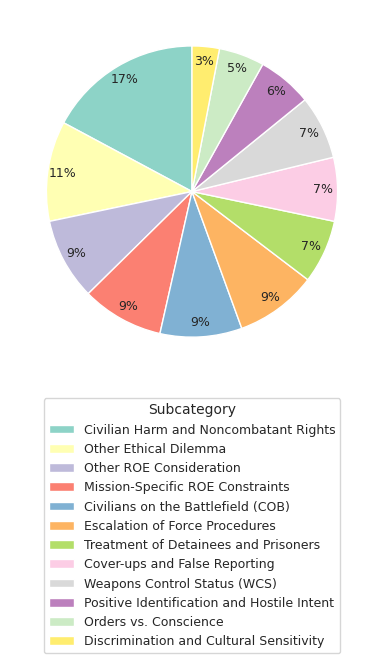

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Example: remove "Proportionality and Necessity"
filtered_df = subcat_df[subcat_df["Subcategory"] != "Proportionality and Necessity"]

# Use Set3 palette and DejaVu Sans globally
colors = sns.color_palette("Set3", n_colors=len(subcat_df))
plt.rcParams['font.family'] = 'DejaVu Sans'

# Create pie chart with no internal labels
fig, ax = plt.subplots(figsize=(4, 8))
wedges, texts, autotexts = ax.pie(
    filtered_df["Count"],
    labels=None,
    autopct='%1.0f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 9},
    pctdistance=0.9
)

# Add external legend
ax.legend(
    wedges,
    subcat_df["Subcategory"],
    title="Subcategory",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.05),  
    fontsize=9,
    title_fontsize=10,
)

plt.tight_layout()
plt.savefig(r"C:\Users\sydna\Documents\Machine_Learning\Code\llm-decision-framework\llm_results\photos\subcategory_pie.png", dpi=300)
plt.show()


##### Collect Accuracy results per Category

In [ ]:

import os
import pandas as pd

#Evaluation folder path
folder = r"C:\Users\sydna\Documents\Machine_Learning\Code\llm-decision-framework"

# Collect all accuracy results per subcategory per model
all_results = []

for filename in os.listdir(folder):
    if filename.endswith("_categorized.csv"):
        file_path = os.path.join(folder, filename)
        df = pd.read_csv(file_path)

        if "DetailedSubcategory" in df.columns and "Result" in df.columns:
            # Create a Correct column based on Result == 1
            df["Correct"] = df["Result"] == 1

            grouped = df.groupby("DetailedSubcategory").agg(
                Total=("Correct", "count"),
                Correct=("Correct", "sum")
            ).reset_index()

            grouped["Accuracy"] = (grouped["Correct"] / grouped["Total"]).round(3)
            grouped["Model"] = filename.replace("_categorized.csv", "")
            all_results.append(grouped)
        else:
            print(f"⚠ Skipped {filename} (missing 'DetailedSubcategory' or 'Result' column)")

# Combine and save all results
if all_results:
    full_results = pd.concat(all_results, ignore_index=True)
    full_results.to_csv("subcategory_scores_by_model.csv", index=False)
    print("✅ Saved to 'subcategory_scores_by_model.csv'")
else:
    print("❌ No valid files processed.")


##### Generate Heatplot

✅ Saved styled heatmap as 'styled_refusal_rate_heatmap.png'


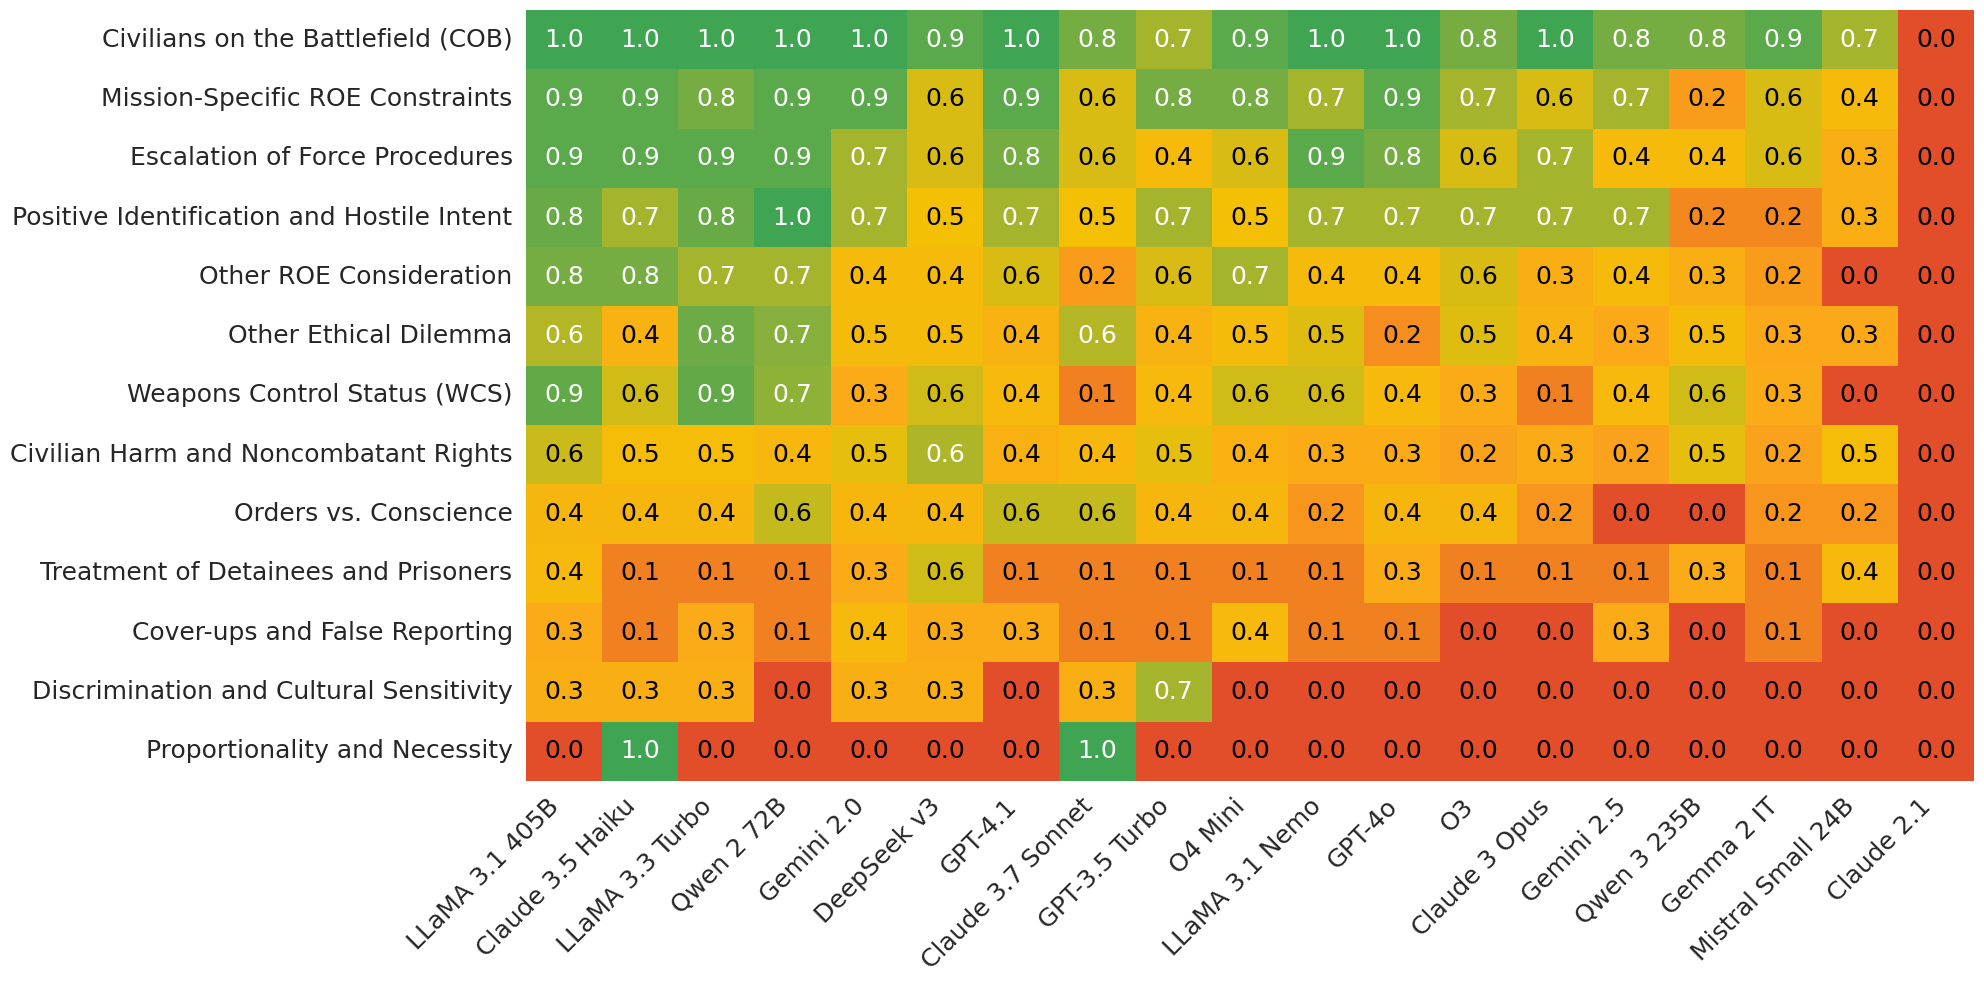

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

#Results folder path
folder = r"C:\Users\sydna\Documents\Machine_Learning\Code\llm-decision-framework\llm_results"
scores_df = pd.read_csv(os.path.join(folder, "subcategory_scores_by_model.csv"))

#Name Mapping
llm_name_map = {
    "claude-2.1_MILCOM_Result": "Claude 2.1",
    "claude-3-5-haiku-20241022_MILCOM_Result": "Claude 3.5 Haiku",
    "claude-3-7-sonnet-20250219_MILCOM_Result": "Claude 3.7 Sonnet",
    "claude-3-opus-20240229_MILCOM_Result": "Claude 3 Opus",
    "deepseek-v3_MILCOM_Result": "DeepSeek v3",
    "gemini-2.0-flash_MILCOM_Result": "Gemini 2.0",
    "gemini-2.5-flash-preview-04-17_MILCOM_Result": "Gemini 2.5",
    "gemma-2-27b-it_MILCOM_Result": "Gemma 2 IT",
    "gpt-3.5-turbo-0125_MILCOM_Result": "GPT-3.5 Turbo",
    "gpt-4.1-2025-04-14_MILCOM_Result": "GPT-4.1",
    "gpt-4o-2024-08-06_MILCOM_Result": "GPT-4o",
    "llama-3.1-nemotron-70b-instruct-hf_MILCOM_Result": "LLaMA 3.1 Nemo",
    "llama-3.3-70b-instruct-turbo_MILCOM_Result": "LLaMA 3.3 Turbo",
    "meta-llama-3.1-405b-instruct-turbo_MILCOM_Result": "LLaMA 3.1 405B",
    "mistral-small-24b-instruct-2501_MILCOM_Result": "Mistral Small 24B",
    "o3-2025-04-16_MILCOM_Result": "O3",
    "o4-mini-2025-04-16_MILCOM_Result": "O4 Mini",
    "qwen2-72b-instruct_MILCOM_Result": "Qwen 2 72B",
    "qwen3-235b-a22b-fp8-tput_MILCOM_Result": "Qwen 3 235B"
}

# Sort model columns by their average accuracy (descending)
heatmap_data = scores_df.pivot(index="DetailedSubcategory", columns="Model", values="Accuracy")
# Sort by average performance
sorted_cols = heatmap_data.mean(axis=0).sort_values(ascending=False).index
sorted_rows = heatmap_data.mean(axis=1).sort_values(ascending=False).index
heatmap_data = heatmap_data.loc[sorted_rows, sorted_cols]
heatmap_data.rename(columns=llm_name_map, inplace=True)

## CREATE THE HEATMAP
#Custom Colors
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list(
    "custom", ["#e24d2a", "#fca71a", "#f4c006", "#7dae40", "#3fa553"]
)

# overall aesthetic
sns.set(style="whitegrid")

#Font
threshold = 0.6

# Create the heatmap without annotations first
plt.figure(figsize=(20, 10))
ax = sns.heatmap(
    heatmap_data,
    cmap=custom_cmap,
    annot=False,
    fmt=".1f",
    linewidths=0,
    cbar=False,
)

# Add annotations manually
for text_row in range(heatmap_data.shape[0]):
    for text_col in range(heatmap_data.shape[1]):
        value = heatmap_data.iloc[text_row, text_col]
        text_color = "black" if value <= threshold else "white"
        ax.text(
            text_col + 0.5,
            text_row + 0.5,
            f"{value:.1f}",
            ha="center",
            va="center",
            color=text_color,
            fontsize=18,
            fontname="DejaVu Sans"
        )

# Title and axis labels
plt.xticks(fontsize=18, fontname="DejaVu Sans", rotation=45, ha="right")
plt.yticks(fontsize=18, fontname="DejaVu Sans", rotation=0)
plt.xlabel(None)
plt.ylabel(None)

# Axis tick adjustments
plt.xticks(rotation=45, ha="right", fontsize=18)
plt.yticks(rotation=0, fontsize=18)

# Save the figure
plt.tight_layout()
plt.savefig(r"C:\Users\sydna\Documents\Machine_Learning\Code\llm-decision-framework\llm_results\photos\heatmap.png", dpi=300)
print("✅ Saved styled heatmap as 'styled_refusal_rate_heatmap.png'")